<a href="https://colab.research.google.com/github/cafechungkhoan/lyd-report/blob/main/HAR_19102021_Crawl_Topic_%26_Comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LYD - Crawl Topic & Comment**

*LYD là hệ thống áp dụng Deep Learning dùng để quét, tóm tắt, phân tích và dự báo cảm xúc của nhà đầu tư. Với mục đích hỗ trợ nghiệp vụ tư vấn IR (Investor Relation)*

In [ ]:
#@title Input Parameter
a = input('Nhập mã cần search: ')
b= input('Nhập giới hạn comment (Suggest 100): ')

Nhập mã cần search: har
Nhập giới hạn comment (Suggest 100): 200


---
# **Các thống kê cơ bản**

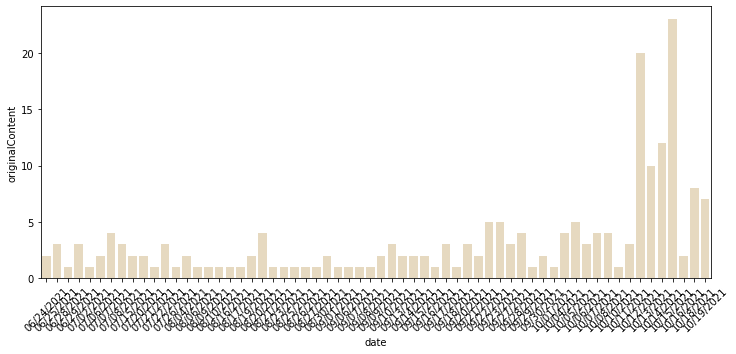

In [ ]:
#@title Số lượng comment theo thời gian (fireant)
data1 = data.groupby('date').count()
data1 = data1.reset_index()

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
x = data1['originalContent']
y = data1['date']

import seaborn as sns
sns.set_color_codes("muted")
plt.figure(figsize = (12,5))
plt.xticks(rotation=45)
sns.barplot(x=y,y =x, label ="Số lượng comment", color = '#ECDBBA')

Text(0.5, 1.0, 'Top 10 Commenter')

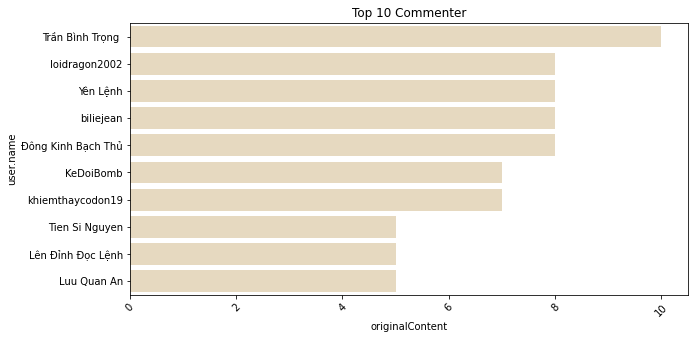

In [ ]:
#@title Top 10 Commenter (Fireant)
data2 = data.groupby('user.name').count().sort_values(by='originalContent', ascending=False)
data2 = data2.reset_index()
data2 = data2.iloc[:10]

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
x = data2['user.name']
y = data2['originalContent']

import seaborn as sns
sns.set_color_codes("muted")
plt.figure(figsize = (10,5))
plt.xticks(rotation=45)
sns.barplot(x=y,y =x, label ="Số lượng comment", color = '#ECDBBA').set_title('Top 10 Commenter')

Text(0.5, 1.0, 'Trung vị người tham gia bình luận')

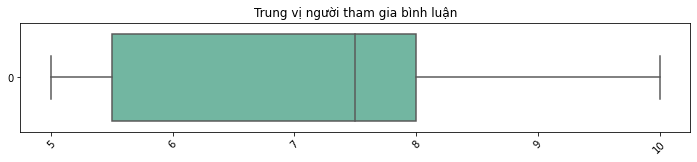

In [ ]:
#@title Trung bình một người comment bao nhiêu lần?
plt.figure(figsize = (12,2))
plt.xticks(rotation=45)
sns.boxplot(data=data2['originalContent'], orient="h", palette="Set2", showfliers = False).set_title('Trung vị người tham gia bình luận')

In [ ]:
#@title Chi tiết Comment Fireant
data

,originalContent,date,totalLikes,roomID,roomName,user.name
0,Har tím,10/19/2021,2,None,None,Luu Quan An
1,E chính thức chia tay e nó. Chốt lãi êm ái. Nhường lại kèo tiếp cho ae,10/19/2021,1,None,None,Hiệp LV
2,Trần liên tục,10/19/2021,0,None,None,Yêu Màu Tím
3,Ngày mai hơn 12 triệu cổ T3 về nó chốt vào mồm các bạn . Mình không biết har có game j nhưng tăng liên tục 6 phiên rồi đó,10/19/2021,0,None,None,Hiep Nguyen
4,Khoẻ qa!!!,10/19/2021,1,None,None,Phạm Trinh
5,Har,10/19/2021,2,None,None,Luu Quan An
6,Hàng Penny ae chơi được!,10/19/2021,4,None,None,Huấn Hoa Hồng
7,Tôi mua con này đúg xứng tầm đẳng cấp a bảo. Kkk,10/18/2021,2,None,None,Nguyen An An
8,Har tím,10/18/2021,2,None,None,Luu Quan An
9,"Anh em lên thuyền vẫn kịp , vượt 14.28 đánh lên 16.3",10/18/2021,5,None,None,Trần Bình Trọng


In [ ]:
#@title Chi tiết Topic, Comment & Timing F319
df

,title,url,originalContent,date
0,HQC - ITA - TTF - TTB - OGC những siêu phẩm very nặng mông!,http://f319.com/threads/hqc-ita-ttf-ttb-ogc-nhung-sieu-pham-very-nang-mong.1679835/,Nhìn thấy ngon ngon nhỉ . múc ăn noel được không ae ơi. nặng mông như HAR DRH DLG còn chạy tít mù khơi thì mấy em này đứng nhìn hay sao. đừng vào chê rác. thích blue thì tìm hàng phục vụ xóc dĩa phái sinh như VIC VCB SSI mà chơi nhé.,10/14/2021
1,LDG nổ vol khủng. Chủ tịch hứa là phải làm. Sẽ có giá 10 trong tháng 10 này. 800ha 60k tỷ đồng,http://f319.com/threads/ldg-no-vol-khung-chu-tich-hua-la-phai-lam-se-co-gia-10-trong-thang-10-nay-800ha-60k-ty-dong.1679247/,LDG nổ vol khủng. Chủ tịch hứa là phải làm. Sẽ có giá 10 trong tháng 10 này. 800ha 60k tỷ đồng ITC đang trên hành trình nổ vol kinh khủng 2 ngày qua đang trở về giá trị sổ sách là 23. HAR trần kiểu này chắc x2 TK. Giá 10 trong tháng này luôn.,10/13/2021
2,Sóng bất động sản cuồn cuộn cho cuối năm,http://f319.com/threads/song-bat-dong-san-cuon-cuon-cho-cuoi-nam.1679195/,"Nhận định sóng bất động sản là con sóng to nhất cuối năm. Phía bắc: - Cầu Trần Hưng Đạo - Bờ sông Hồng - Thành phố trong thành phố với việc cho 3 huyện lên quận thành phố Miền Nam: - Cầu Thủ Thiêm 2 - Khu thương mại trong Sala sắp mở - Metro sắp chạy - Đường vanh đai và các tỉnh vệ tinh Bình Dương, Đồng Nai, Long An, BRVT đất lên giá Miền ĐBSCL: - Cảng, đường cao tốc đang xây và nâng cấp Miền Trung: - Các đại gia bds về đây vừa KCN vừa khu đô thị T&T Vin Vina Sun Hòa Phát... Vì vậy ACE có thể lựa chọn HDG SJS NTL AAV HPX FLC CEO SCR LDG VHM HAR QCG --- Gộp bài viết, 13/10/2021 lúc 10:59, Bài cũ: 13/10/2021 lúc 10:55 --- Không khuyến nghị mua/bán đây là cảm nghiệm cá nhân mình. Lưu ý các con hàng có game pht thì người mới chơi vào không đúng nhịp sẽ rất xấu Đề cử thêm HQC HDC DIG ...các con dòng SD.. cp điện có đất vàng",10/13/2021
3,HAR - lên 9.9 thôi a Bảo ơi!,http://f319.com/threads/har-len-9-9-thoi-a-bao-oi.1678563/,Lâu quá rồi chưa chạy. Nhiều con chả có vẹo gì cũng x2-100 lần rồi mà a Bảo vẫn lẹt đẹt 4-5. Tuần này lo mà kéo đi a Bảo nhé.,10/11/2021
4,Toàn cảnh HAR,http://f319.com/threads/toan-canh-har.1675889/,"HAR Vốn điều lệ 1.000 tỷ Giá trị sổ sách 10,8k Thai Inveting thâu tóm chưa rõ mục đich Đất vàng khá nhiều Kỳ vọng game thâu tóm bất ngờ thì đầu tư, ngắn hạn chưa có nhiều thứ thực sự rõ ràng Trong bối cảnh nhiều cổ phiếu tăng giá 3-5 lần không rõ lý do, chưa do cơ bản, thì mình thấy HAR vùng giá này có thể mua test được mọi người có thêm thông tin sâu hơn thì nhắn nhé. Mình đang trong quá trình tìm hiểu, cần sự hỗ trợ của các cao thủ https://nhadautu.vn/bi-an-thai-inve...i-gia-dat-vang-an-duong-thao-dien-d14755.html --- Gộp bài viết, 04/10/2021, Bài cũ: 04/10/2021 --- xét về tài sản như bài báo thì sẽ có 1 đợt tăng khá nhiều trần",10/04/2021
5,Những cổ penny hấp thụ được dòng tiền lớn,http://f319.com/threads/nhung-co-penny-hap-thu-duoc-dong-tien-lon.1669195/,"Trên thị trường hiện nay cổ phiếu tốt đã bay cao, không thể cứ cao mãi được, dòng tiền lớn dư thừa trên thị trường phải tìm nơi oánh bạc. Điểm nhấn phiên cuối tuần là mặc dù thanh khoản hose 25k tỷ nhưng vào vn30 chỉ có 10k tỷ, như vậy 15k tỷ đang tập trung ở nhóm nhỏ ngoài vn30. Điểm nổ của HNG SCR báo hiệu cho con sóng thần penny thanh khoản cao mang trong mình quá khứ bluchip, có thể hấp thụ lượng tiền lớn( chứ không phải vài em nhà louis ko thanh khoản) Anh em chọn đề cử một số penny thanh khoản cao trên 50 tỷ mỗi phiên để tiền lớn oánh bạc. --- Gộp bài viết, 18/09/2021 lúc 07:58, Bài cũ: 18/09/2021 lúc 07:52 --- Chủ top đề cử một số penny tiêu biểu: HNG HAG DLG HQC HAR OGC AMD ROS HAI",09/18/2021
6,HAR thương hiệu BĐS hàng hiệu cùng Cô Ba Sài Gòn,http://f319.com/threads/har-thuong-hieu-bds-hang-hieu-cung-co-ba-sai-gon.1666093/,Giá này thì phân tích phân tò làm gì cho mệt .Giá đang giao dịch bằng 50% giá trj sổ sách .Buồn cho một cổ phiếu Blue khi xưa đáng giá cọng rau muống Giao dịch hôm nay ngửi thấy mùi giấy Bạc quanh quẩn đâu đây rồi . https://donggoitrit